<a href="https://colab.research.google.com/github/InzamanCareem/Customer-Telecom-Churn-Prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Coursework/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Understanding the Dataset

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
df = pd.read_csv(dataset_path)
print(df.shape)

(7043, 21)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                    "Contract", "PaperlessBilling", "PaymentMethod"]
target_col = "Churn"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
for cat in categorical_cols:
  print(f"{cat}: {df[cat].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
for cat in categorical_cols:
  df[cat] = df[cat].astype('category')

In [ ]:
df["Churn"] = df["Churn"].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

## Target Variable Exploration

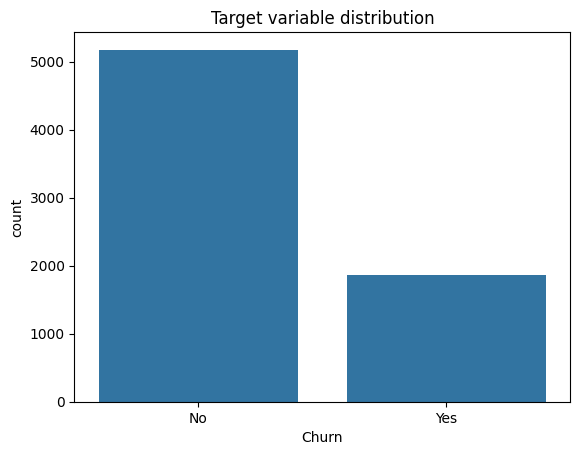

In [ ]:
sns.countplot(df, x="Churn")
plt.title("Target variable distribution")
plt.show()

In [ ]:
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


* There are about 73% of the customers who left the service last month and about 26% of the customers who are actively using the service.

## Numerical Feature Exploration

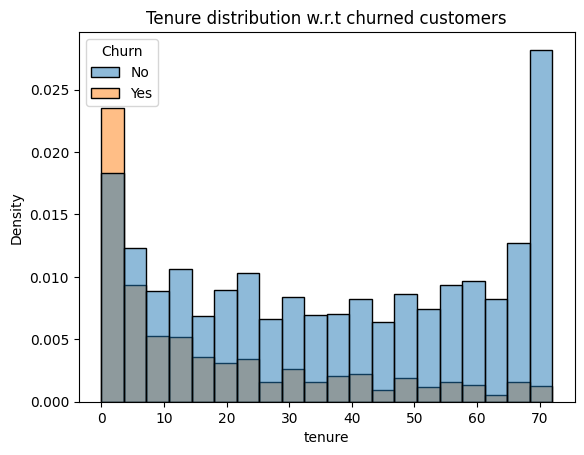

In [ ]:
sns.histplot(df, x="tenure", stat="density", bins=20, hue="Churn")
plt.title("Tenure distribution w.r.t churned customers")
plt.show()

* There are many customers with very low tenure (customers who joined recently) tend to leave the service.
* There are many customers with very high tenure (customers who has been with the company for long term) tend not to leave their service.

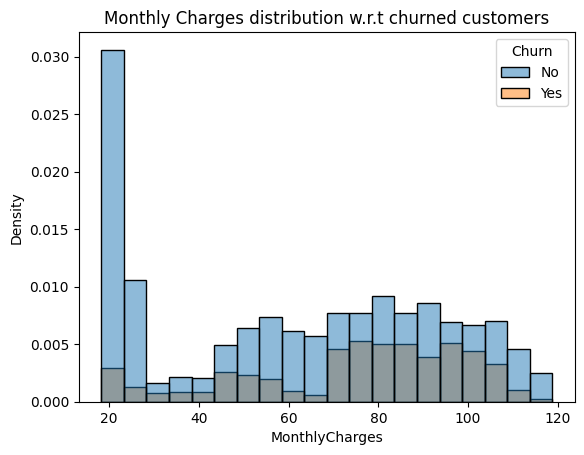

In [ ]:
sns.histplot(df, x="MonthlyCharges", stat="density", bins=20, hue="Churn")
plt.title("Monthly Charges distribution w.r.t churned customers")
plt.show()

* There are many customers with very low monthly charges tend to not leave the service.

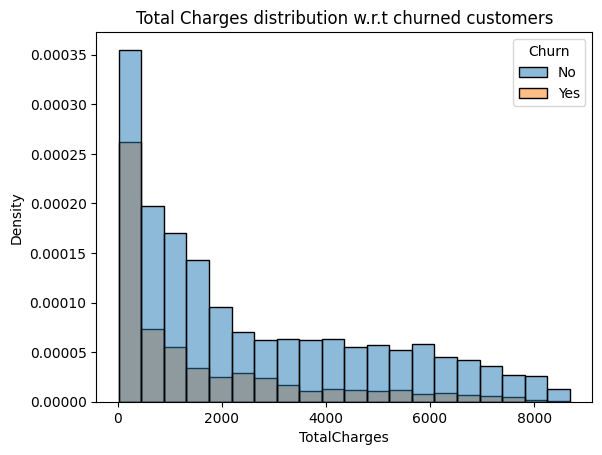

In [ ]:
sns.histplot(df, x="TotalCharges", stat="density", bins=20, hue="Churn")
plt.title("Total Charges distribution w.r.t churned customers")
plt.show()

* Customers who have low total charges behave almost similar to either staying or leaving the service.

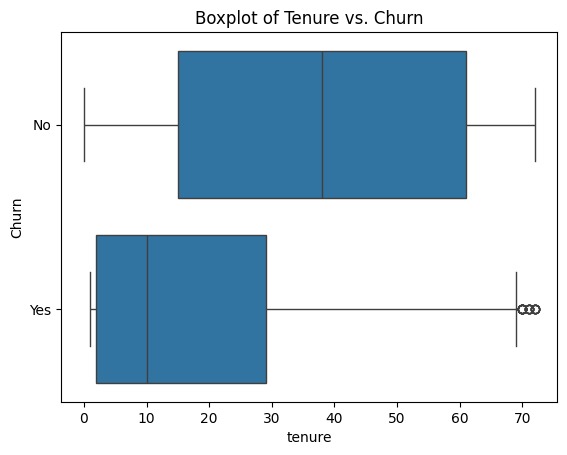

In [ ]:
sns.boxplot(df, y="Churn", x="tenure")
plt.title("Boxplot of Tenure vs. Churn")
plt.show()

* Tenure and Churn is negatively correlated, customers with lower tenure are more likely to leave.
* If a customer leaves, it mostly happens between 20 to 30 months.
* Some customers with high tenure still churn, which can be considered as outliers

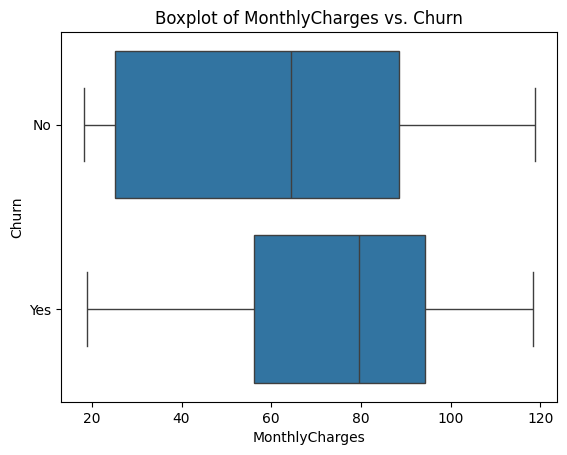

In [ ]:
sns.boxplot(df, y="Churn", x="MonthlyCharges")
plt.title("Boxplot of MonthlyCharges vs. Churn")
plt.show()

* MonthlyCharges and Churn is positively correlated, customers with lower montly charges are more likely to stay.

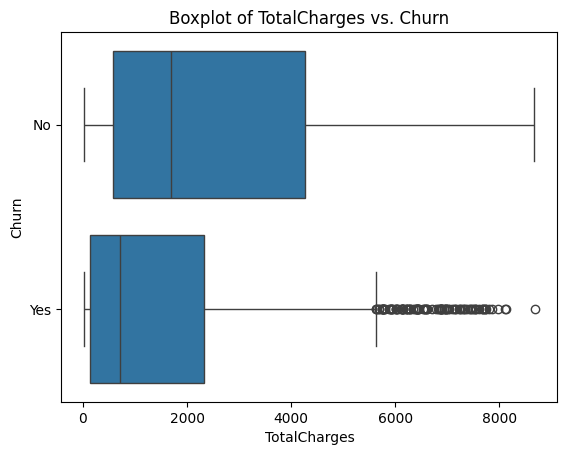

In [ ]:
sns.boxplot(df, x="TotalCharges", y="Churn")
plt.title("Boxplot of TotalCharges vs. Churn")
plt.show()

* TotalCharges and Churn is positively correlated, customers with lower total charges are more likely to stay.
* Some customers with high total charges still churn, which can be considered as outliers

In [ ]:
numeric_df = df[numerical_cols].copy()
numeric_df[target_col] = df[target_col]
numeric_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


In [ ]:
numeric_df["Churn"] = (numeric_df["Churn"] == "Yes").astype(int)

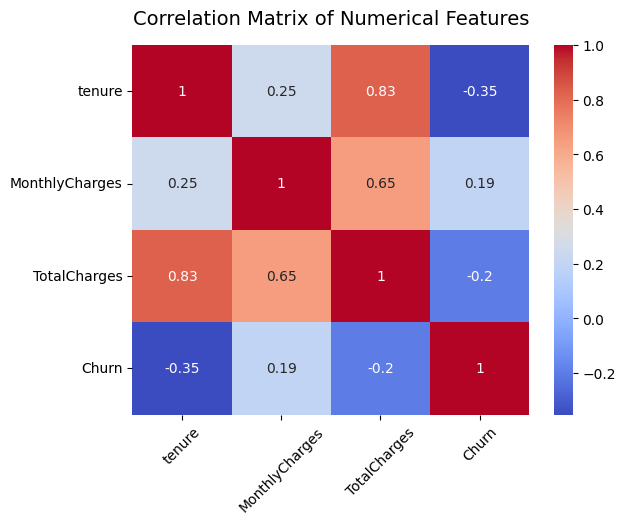

In [ ]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features", fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

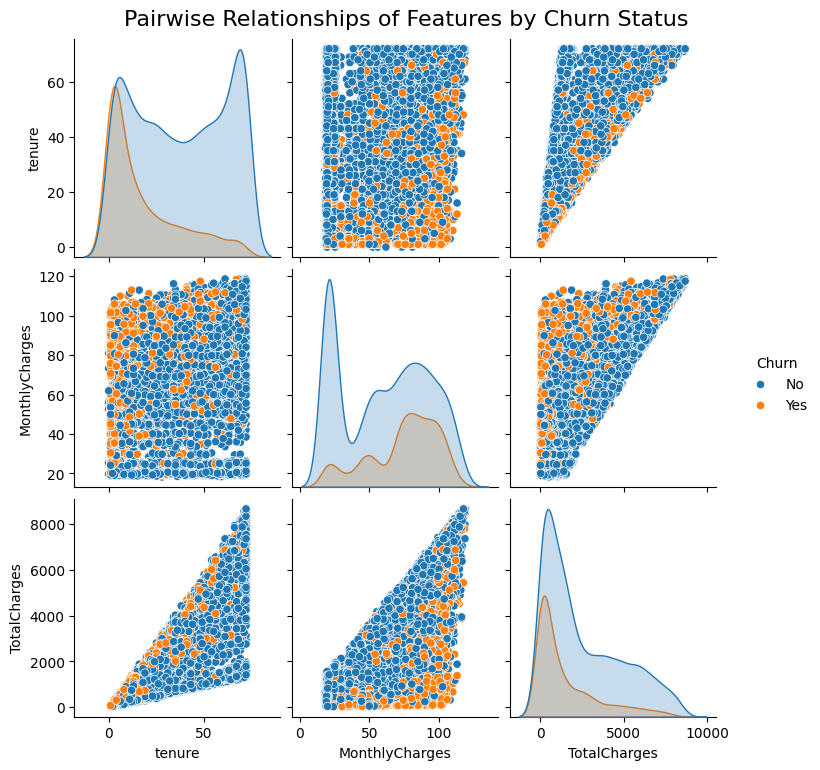

In [ ]:
sns.pairplot(df, hue="Churn")
plt.suptitle("Pairwise Relationships of Features by Churn Status", fontsize=16, y=1.02)
plt.show()

## Categorical Feature Exploration

In [ ]:
pd.crosstab(df['gender'], df['Churn'])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [ ]:
categorical_df = df[categorical_cols].copy()
categorical_df[target_col] = df[target_col]
categorical_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


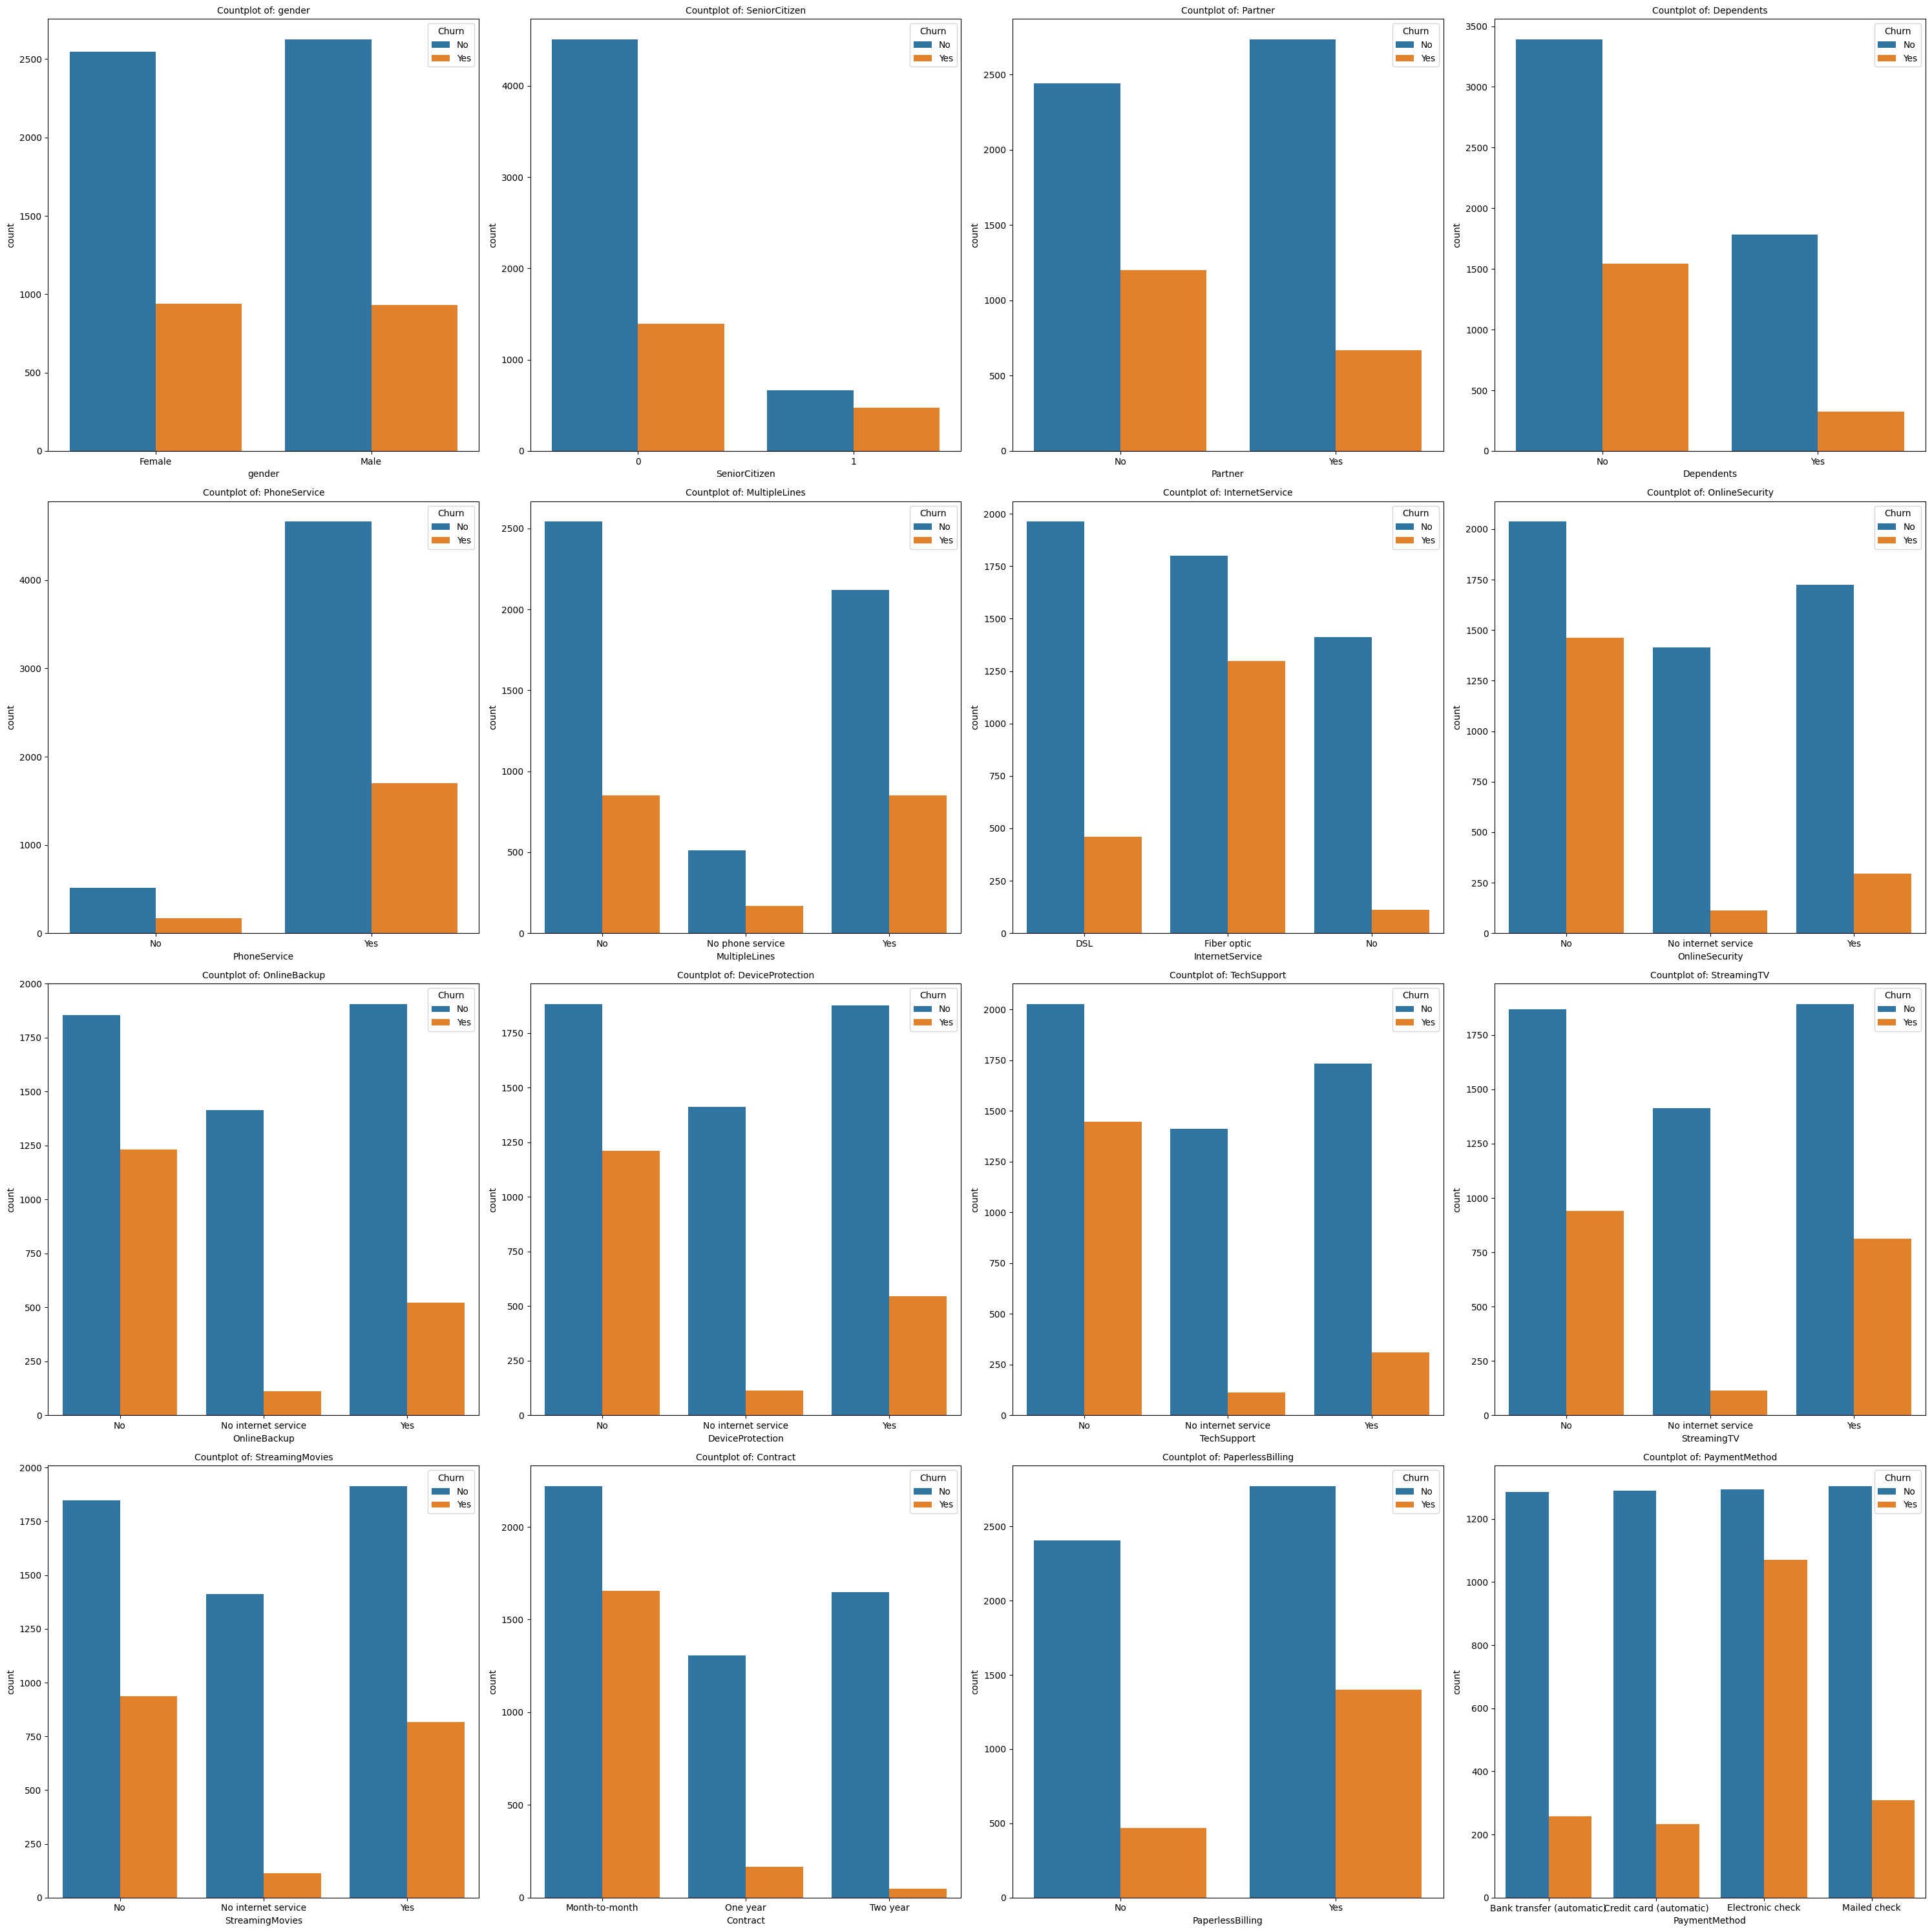

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(30, 30))

axs = axs.flatten()

for index, col in enumerate(categorical_cols):
    sns.countplot(categorical_df, x=col, hue=target_col, ax=axs[index])
    axs[index].set_title(f"Countplot of: {categorical_cols[index]}", fontsize=10)

plt.tight_layout()
plt.show()

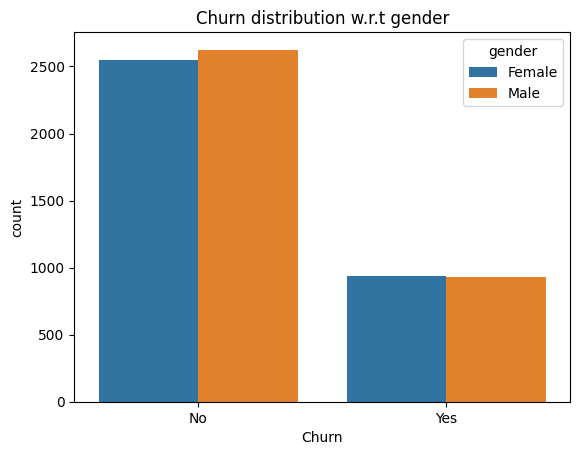

In [ ]:
sns.countplot(df, x="Churn", hue="gender")
plt.title("Churn distribution w.r.t gender")
plt.show()

* Both genders (male and female) behaved similar to either staying or leaving the service.

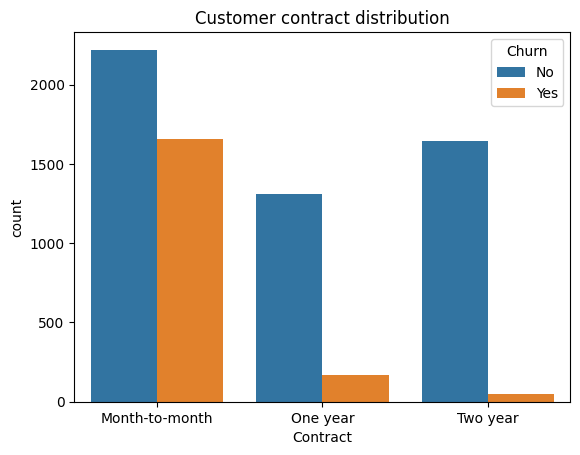

In [ ]:
sns.countplot(df, x="Contract", hue="Churn")
plt.title("Customer contract distribution")
plt.show()

* Many customers with month to month contract tend to leave the service compared to one year and two year contracts.

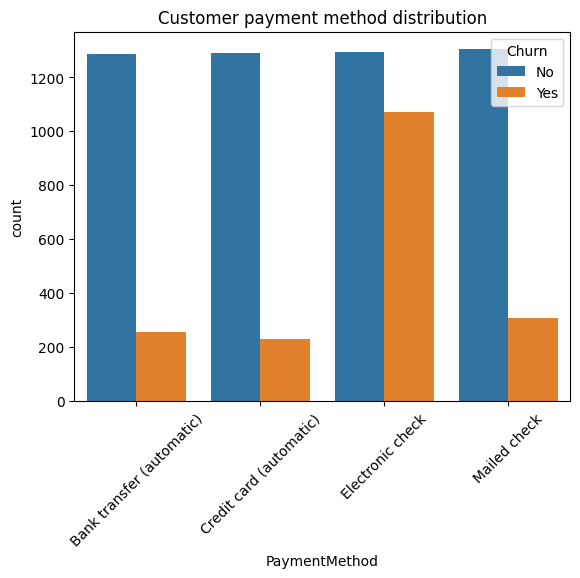

In [ ]:
sns.countplot(df, x="PaymentMethod", hue="Churn")
plt.title("Customer payment method distribution")
plt.xticks(rotation=45)
plt.show()

* Many customers who left the service paid using electronic check.
* Many customers who stayed for the service paid using bank transfer, credit card and mailed check.